In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from CalculateMetrics import calculate_all_metrics
import matplotlib.pyplot as plt
from EnderClassifierBoundedFast import EnderClassifier as ECBF
from EnderClassifierModified import EnderClassifier as ECM

# df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS.csv.gz", compression='gzip', header=None)
# X_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X.csv", header=None)
# y_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y.csv", header=None)
X_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X_10k.csv", header=None)
y_sample = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y_10k.csv", header=None)

In [2]:
# df.columns = [str(i) for i in range(df.shape[1])]
# print("Class 0:", df["0"].value_counts())
# X = df.drop(columns=["0"])  # Assuming the first column is the target variable
# y = df.iloc[:, 0].astype(int)  # Assuming the first column is the target variable

# _, X_sample, _, y_sample = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
# X_sample.to_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_X_10k.csv", index=False, header=False)
# y_sample.to_csv("C:/Users/iwama/Desktop/Osobiste/MSc/HIGGS_sample_y_10k.csv", index=False, header=False)

y_sample = y_sample.iloc[:, 0].astype(int)  # Ensure y_sample is a Series of integers
X_sample.columns = [str(i) for i in range(X_sample.shape[1])]
print("Sampled class 0:", y_sample.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

Sampled class 0: 0
1    5299
0    4701
Name: count, dtype: int64


In [5]:
for max_clusters in [5,7,9,12]:
    for n_rules in [28,32,34,36]:
        ender = ECBF(n_rules=n_rules, max_clusters=max_clusters, verbose=False)
        ender.fit(X_train, y_train)
        y_pred = ender.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_proba = ender.predict_proba(X_test)[:, 1]
        print(f"Clusters: {max_clusters}, Rules: {n_rules}: Accuracy: {accuracy_score(y_test, y_pred):.4f}, AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("\n" + "="*50 + "\n")

Clusters: 5, Rules: 28: Accuracy: 0.6505, AUC: 0.7178
Clusters: 5, Rules: 32: Accuracy: 0.6495, AUC: 0.7205
Clusters: 5, Rules: 34: Accuracy: 0.6510, AUC: 0.7214
Clusters: 5, Rules: 36: Accuracy: 0.6510, AUC: 0.7227


Clusters: 7, Rules: 28: Accuracy: 0.6465, AUC: 0.7173
Clusters: 7, Rules: 32: Accuracy: 0.6525, AUC: 0.7208
Clusters: 7, Rules: 34: Accuracy: 0.6515, AUC: 0.7225
Clusters: 7, Rules: 36: Accuracy: 0.6495, AUC: 0.7224


Clusters: 9, Rules: 28: Accuracy: 0.6500, AUC: 0.7209
Clusters: 9, Rules: 32: Accuracy: 0.6520, AUC: 0.7242
Clusters: 9, Rules: 34: Accuracy: 0.6525, AUC: 0.7246
Clusters: 9, Rules: 36: Accuracy: 0.6515, AUC: 0.7251


Clusters: 12, Rules: 28: Accuracy: 0.6545, AUC: 0.7233
Clusters: 12, Rules: 32: Accuracy: 0.6515, AUC: 0.7267
Clusters: 12, Rules: 34: Accuracy: 0.6540, AUC: 0.7272
Clusters: 12, Rules: 36: Accuracy: 0.6520, AUC: 0.7273




In [3]:
def run_test(model, name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.array(y_pred)
    if y_pred.ndim > 1:
        y_pred = np.array([np.argmax(pred) for pred in y_pred])
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(name)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report - Test:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = ['Class 0', 'Class 1']
    print("Confusion Matrix:")
    print(f"{'':<20}{labels[0]:<20}{labels[1]:<20}")
    print(f"{labels[0]:<20}{cm[0, 0]:<20}{cm[0, 1]:<20}  # True Negative (TN), False Positive (FP)")
    print(f"{labels[1]:<20}{cm[1, 0]:<20}{cm[1, 1]:<20}  # False Negative (FN), True Positive (TP)")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

XGBoost Classifier
Accuracy: 0.6835
ROC AUC: 0.7483
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       940
           1       0.69      0.72      0.71      1060

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             606                 334                   # True Negative (TN), False Positive (FP)
Class 1             299                 761                   # False Negative (FN), True Positive (TP)


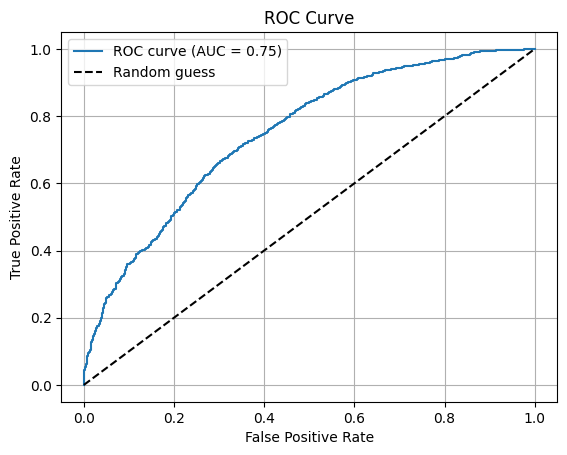

In [4]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
run_test(xgb_model, "XGBoost Classifier", X_train, y_train, X_test, y_test)
# 0.2s

Ender Classifier Modified
Accuracy: 0.6435
ROC AUC: 0.7083
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56       940
           1       0.63      0.79      0.70      1060

    accuracy                           0.64      2000
   macro avg       0.65      0.63      0.63      2000
weighted avg       0.65      0.64      0.63      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             448                 492                   # True Negative (TN), False Positive (FP)
Class 1             221                 839                   # False Negative (FN), True Positive (TP)


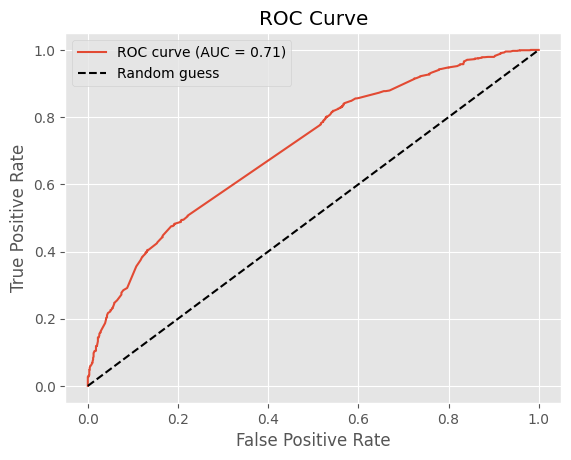

In [5]:
ecm = ECM(verbose=False, n_rules=30, use_gradient=False)
run_test(ecm, "Ender Classifier Modified", X_train, y_train, X_test, y_test)
# 2.1s

Ender Classifier Modified with Gradient
Accuracy: 0.6520
ROC AUC: 0.7156
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       940
           1       0.67      0.69      0.68      1060

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             573                 367                   # True Negative (TN), False Positive (FP)
Class 1             329                 731                   # False Negative (FN), True Positive (TP)


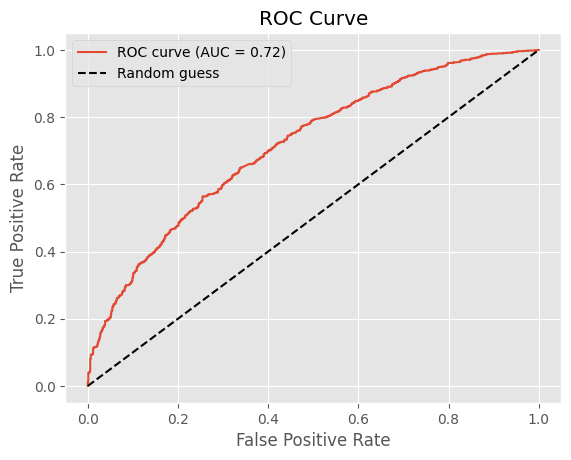

In [6]:
ecm = ECM(verbose=False, n_rules=25, use_gradient=True)
run_test(ecm, "Ender Classifier Modified with Gradient", X_train, y_train, X_test, y_test)
# 5.0s

Ender Classifier Bounded Fast
Accuracy: 0.6670
ROC AUC: 0.7254
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       940
           1       0.70      0.66      0.68      1060

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             636                 304                   # True Negative (TN), False Positive (FP)
Class 1             362                 698                   # False Negative (FN), True Positive (TP)


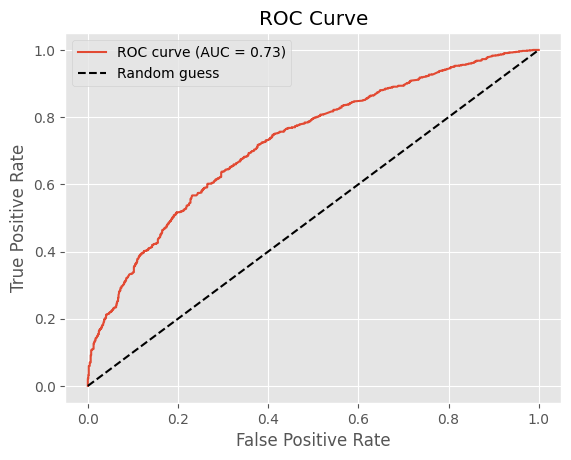

In [ ]:
ecbf = ECBF(verbose=False, n_rules=28, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)
# 4.0s

Ender Classifier Bounded Fast with Gradient
Accuracy: 0.6510
ROC AUC: 0.7214
Classification Report - Test:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       940
           1       0.68      0.64      0.66      1060

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000

Confusion Matrix:
                    Class 0             Class 1             
Class 0             624                 316                   # True Negative (TN), False Positive (FP)
Class 1             382                 678                   # False Negative (FN), True Positive (TP)


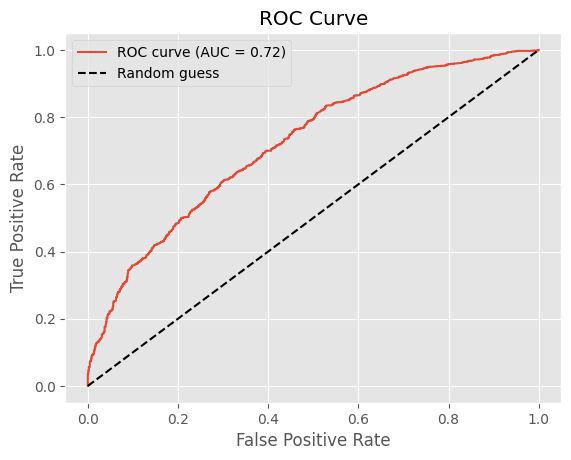

In [ ]:
ecbf = ECBF(verbose=False, n_rules=34, use_gradient=True)
run_test(ecbf, "Ender Classifier Bounded Fast with Gradient", X_train, y_train, X_test, y_test)
# 10.8s

In [9]:
ENDER=ECBF

for n in range(24, 35, 2):
    print(f"Testing with n_rules={n}")
    ender = ENDER(verbose=False, n_rules=n, use_gradient=True)
    ender.fit(X_train, y_train)
    y_pred = ender.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_probs = ender.predict_proba(X_test)
    print(f"n_rules={n}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"n_rules={n}, ROC AUC: {roc_auc_score(y_test, y_probs[:, 1]):.4f}")
    print("================================")

Testing with n_rules=24
n_rules=24, Accuracy: 0.6460
n_rules=24, ROC AUC: 0.7151
Testing with n_rules=26


KeyboardInterrupt: 

In [ ]:
ecbf = ECBF(verbose=False, n_rules=14, use_gradient=False)
run_test(ecbf, "Ender Classifier Bounded Fast", X_train, y_train, X_test, y_test)

In [ ]:
# from EnderClassifierModified import EnderClassifier
from EnderClassifierBoundedFast import EnderClassifier

print("ENDER CLASSIFIER BOUNDED FAST")
ender = EnderClassifier(verbose=True, n_rules=30, use_gradient=True)
ender.fit(X_train, y_train, X_test=X_test, y_test=y_test)

In [ ]:
ender.evaluate_all_rules()

In [ ]:
y_preds = ender.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from EnderClassifierModified import EnderClassifier

print("ENDER CLASSIFIER MODIFIED")
ender_modified = EnderClassifier(verbose=False, n_rules=30, use_gradient=True)
ender_modified.fit(X_train, y_train, X_test=X_test, y_test=y_test)

In [ ]:
y_preds = ender_modified.predict(X_test)
y_preds = np.argmax(y_preds, axis=1)
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
y_probs = ender_modified.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_preds = xgb_model.predict(X_test)
y_probs = xgb_model.predict_proba(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_preds))
print("====================")
# y_probs = ender.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, y_probs[:, 1]))
print("====================")
print("Classification Report:\n", classification_report(y_test, y_preds))
print("====================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds))

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()